# Worksheet 12

Name:  Hao Qi  
UID:  U96305250  

### Topics

- Introduction to Classification
- K Nearest Neighbors

### Introduction to Classification

a) For the following examples, say whether they are or aren't an example of classification.

1. Predicting whether a student will be offered a job after graduating given their GPA.
2. Predicting how long it will take (in months) for a student to be offered a job after graduating, given their GPA.
3. Predicting the number of stars (1-5) a person will assign in their Yelp review given the description they wrote in the review.
4. Predicting the number of births occurring in a specified minute. 

1. This is an example of classification. Classification involves assigning classes to data points based on their attributes. The key characteristic of classification is that the prediction is discrete (i.e., belonging to a specific category). In this case, the input attribute is a student’s GPA, and the output is binary (yes or no), a discrete value.  

2. This is NOT an example of classification. The output is a number of estimated months (a continuous value), making it a regression problem rather than a classification because we cannot list all the possible categories. 

3. This is an example of classification. The ratings represent discrete categories (from 1 to 5 stars).  

4. This is NOT an example of classification. The output is a count, which is a continuous variable, thus aligning more with regression analysis than classification.

b) Given a dataset, how would you set things up such that you can both learn a model and get an idea of how this model might perform on data it has never seen?

1. preprocess the data by cleaning, feature engineering, and splitting it into training and test sets

2. select an appropriate model for the problem

3. train the model, possibly applying k-fold cross-validation on the training set to estimate model robustness and finetuning hyperparameters

4. evaluate the model on the test set using suitable metrics to assess its performance on unseen data before going back to the training process or confirming the ultimate model

c) In your own words, briefly explain:

- underfitting
- overfitting

and what signs to look out for for each.

1. **Underfitting** occurs when a model is too simple to capture the complexity of the dataset because of the limited training time or model structure. It doesn't learn enough from the training data, resulting in poor performance on both the training and test sets.  

&nbsp;&nbsp;&nbsp;&nbsp;Signs of underfitting include similar low accuracy on the training and validation/test datasets, suggesting that the model should capture the patterns in the data.  

2. **Overfitting** happens when a model focuses the training data too much, including its noise and outliers. The model performs well on the training data but poorly on unseen data. It memorizes the training data rather than learning the underlying patterns, losing the generalization ability. 

&nbsp;&nbsp;&nbsp;&nbsp;Signs of overfitting include high accuracy on the training data and poor performance on the test or validation data, indicating that the model is too complicated and is capturing noise as if it were a meaningful pattern.

### K Nearest Neighbors

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 10],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 10],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
}

a) Plot the data in a 2D plot, coloring each scatter point in one of two colors depending on its corresponding class.

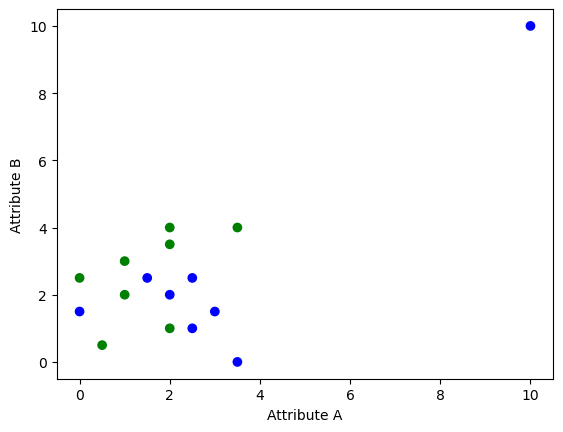

In [2]:
colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data['Attribute A'], data['Attribute B'], color=colors[data["Class"]].tolist())
plt.xlabel('Attribute A')
plt.ylabel('Attribute B')
plt.show()

Outliers are points that lie far from the rest of the data. They are not necessarily invalid points, however. Imagine sampling from a Normal Distribution with a mean of 10 and variance of 1. You would expect most points you sample to be in the range [7, 13], but it’s entirely possible to see 20, which, on average, should be very far from the rest of the points in the sample (unless we're VERY (un)lucky). These outliers can inhibit our ability to learn general patterns in the data since they are not representative of likely outcomes. They can still be useful in themselves and can be analyzed in great depth depending on the problem at hand. 

b) Are there any points in the dataset that could be outliers? If so, please remove them from the dataset.

The point on the top-right corner could be an outlier since other points are distributed in a relatively compact space. The outlier points found respectively in the two attributes using the Interquartile Range (IQR) are consistent with our observation. 

In [3]:
# https://en.wikipedia.org/wiki/Interquartile_range
def get_iqr(data):
    q1 = np.quantile(data, 0.25)
    q2 = np.median(data)
    q3 = np.quantile(data, 0.75)
    iqr = q3 - q1
    down = q1 - 1.5*iqr
    up = q3 + 1.5*iqr
    return [q1, q2, q3, iqr, down, up]

iqr_info_a = get_iqr(data['Attribute A'])
iqr_info_b = get_iqr(data['Attribute B'])

outliers_a = [value for value in data['Attribute A'] if value < iqr_info_a[4] or value > iqr_info_a[5]]
outliers_b = [value for value in data['Attribute B'] if value < iqr_info_b[4] or value > iqr_info_b[5]]

print(outliers_a, outliers_b)

[10] [10]


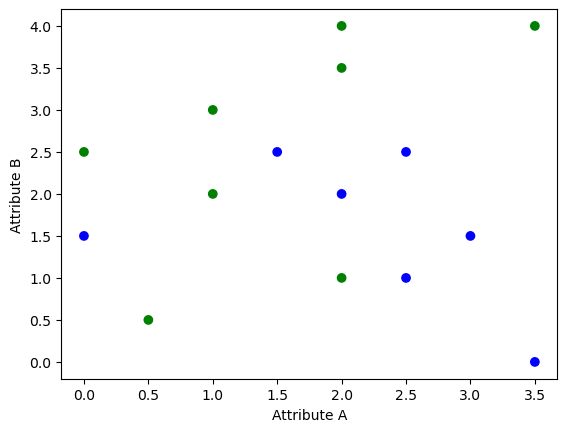

In [4]:
idx = data['Attribute A'].index(10)
data = {key: [value for i, value in enumerate(data[key]) if i != idx] for key in data}

plt.scatter(data['Attribute A'], data['Attribute B'], color=colors[data["Class"]].tolist())
plt.xlabel('Attribute A')
plt.ylabel('Attribute B')
plt.show()

Noise points are points that could be considered invalid under the general trend in the data. They could be the result of actual errors in the data or randomness that we could attribute to oversimplification (for example, if some information/feature about each point is missing). Considering noise points in our model can often lead to overfitting. 

c) Are there any points in the dataset that could be noise points?

For class 0 (represented with blue points), the point with attribute values of (0, 1.5) might be a noise point because the other points might be distributed around a line while it deviates far from that. Class 1 (represented with green points) seems to have no noise. 

For the following point

|  A  |  B  |
|-----|-----|
| 0.5 |  1  |

d) Plot it in a different color along with the rest of the points in the dataset.

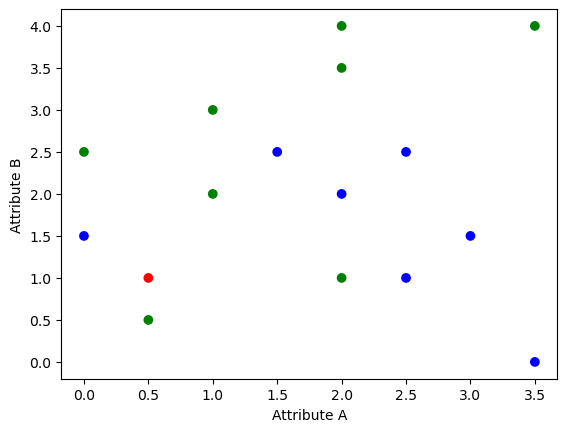

In [5]:
data['Attribute A'].append(0.5)
data['Attribute B'].append(1)
data['Class'].append(2) # 2 refers to unknown

plt.scatter(data['Attribute A'], data['Attribute B'], color=colors[data["Class"]].tolist())
plt.xlabel('Attribute A')
plt.ylabel('Attribute B')
plt.show()

e) Write a function to compute the Euclidean distance from it to all points in the dataset and pick the three closest points to it. In a scatter plot, draw a circle centered around the point with a radius of the distance of the farthest of the three points. 

In [6]:
data['Attribute A'].pop()
data['Attribute B'].pop()
data['Class'].pop()

print(data)

{'Attribute A': [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0.0], 'Attribute B': [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5], 'Class': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1]}


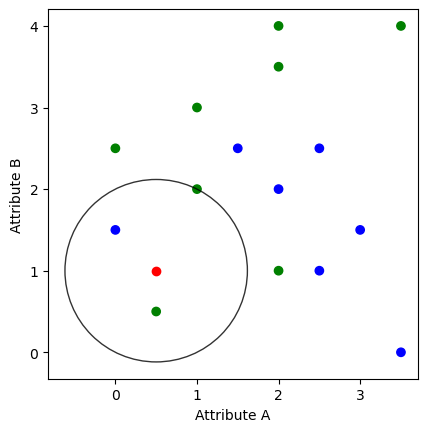

In [7]:
def n_closest_to(example, n, training_set=data):
    x_example, y_example = example
    record = []
    
    for idx, (x, y) in enumerate(zip(training_set['Attribute A'], training_set['Attribute B'])):
        distance = ((x - x_example) ** 2 + (y - y_example) ** 2) ** 0.5
        record.append((idx, distance))
    
    n_closest_distances_with_indices = sorted(record, key=lambda x: x[1])[:n]
    indices, n_closest_distances = zip(*n_closest_distances_with_indices)
    return list(indices), n_closest_distances[-1]

location = (0.5, 1)
_, radius = n_closest_to(location, 3)
_, axes = plt.subplots()
axes.scatter(data['Attribute A'], data['Attribute B'], color=colors[data["Class"]].tolist())
axes.scatter(*location, color='r')
cir = plt.Circle(location, radius, fill=False, alpha=0.8)
axes.add_patch(cir)
axes.set_aspect('equal')    # necessary so that the circle is not oval
plt.xlabel('Attribute A')
plt.ylabel('Attribute B')
plt.show()

f) Write a function that takes the three points returned by your function in e) and returns the class that the majority of points have. Break ties with a deterministic default class of your choosing. Print the class assigned to this new point by your function.

In [8]:
def majority(point_indices, training_set=data):
    point_classes = [training_set['Class'][idx] for idx in point_indices]
    class_count = {}

    for c in point_classes:
        if c in class_count:
            class_count[c] += 1
        else:
            class_count[c] = 1
    
    majority_class = max(class_count, key=class_count.get)  # returns the first maximum value    
    return majority_class

location = (0.5, 1)
indices, _ = n_closest_to(location, 3)
majority_class = majority(indices)
print(f"after voting, the class assigned to point {location} is {majority_class}")

after voting, the class assigned to point (0.5, 1) is 1


g) Re-using the functions from e) and f), you should be able to assign a class to any new point. In this exercise, we will implement Leave-one-out cross-validation to evaluate our model’s performance. 

For each point in the dataset:

- consider that point as your test set and the rest of the data as your training set
- classify that point using the training set
- keep track of whether you were correct with the use of a counter

Once you've iterated through the entire dataset, divide the counter by the number of points in the dataset to report an overall testing accuracy. 

In [9]:
count = 0
for i in range(len(data['Class'])):
    actual_class = data["Class"][i]
    training_set = {key: [value for idx, value in enumerate(data[key]) if idx != i] for key in data}
    indices, _ = n_closest_to((data['Attribute A'][i], data['Attribute B'][i]), 3, training_set)
    prediction = majority(indices, training_set)
    if prediction == actual_class:
        count += 1

print(f"overall accuracy = {round(count / len(data['Class']), 2)}")

overall accuracy = 0.73


## Challenge Problem

For this question we will re-use the "mnist_784" dataset.

a) Begin by creating a training and testing dataset from our dataset, with an 80-20 ratio, and random_state=1. You can use the `train_test_split` function from sklearn. By holding out a portion of the dataset we can evaluate how our model generalizes to unseen data (i.e. data it did not learn from). 

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

X, y = fetch_openml(name='mnist_784', version=1, return_X_y=True, as_frame=False, parser='auto')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

b) For K ranging from 1 to 20:

1. train a KNN on the training data
2. record the training and testing accuracy

Plot a graph of the training and testing accuracy as a function of the number of neighbors K (on the same plot). Which value of K is optimal? Briefly explain.

Training progess...: 100%|██████████| 20/20 [38:43<00:00, 116.15s/it]


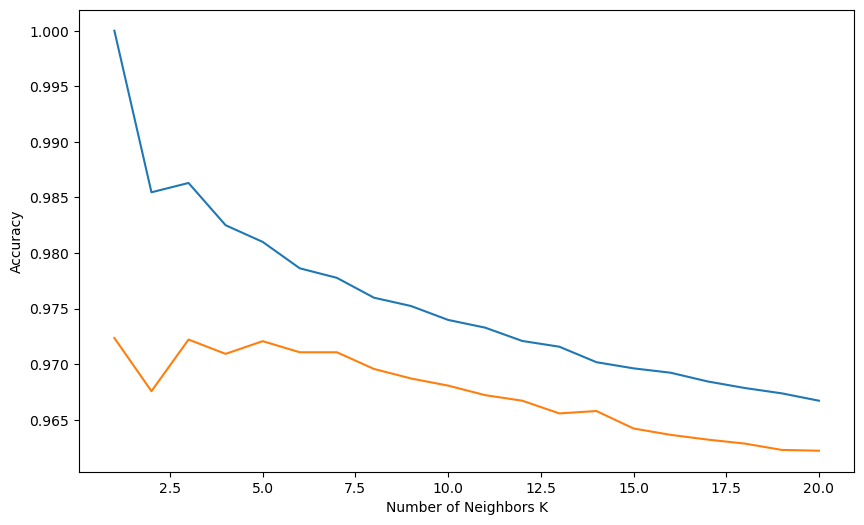

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm

K_range = range(1, 21)
training_accuracies = []
testing_accuracies = []

for K in tqdm(K_range, desc='Training progess...'):
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(X_train, y_train) 
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    training_accuracies.append(accuracy_score(y_train, y_train_pred))
    testing_accuracies.append(accuracy_score(y_test, y_test_pred))

plt.figure(figsize=(10, 6))
plt.plot(K_range, training_accuracies, label='Training Accuracy')
plt.plot(K_range, testing_accuracies, label='Testing Accuracy')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.show()

I think the best K value is 3 because the model maintains a high accuracy on both the training and testing set at K=3, and after that, the accuracy clearly declines. Although the model also performs well at K=1, a training accuracy as high as 100% may suggest that the model lacks generalization ability.  

c) Using the best model from b), pick an image at random and plot it next to its K nearest neighbors. 

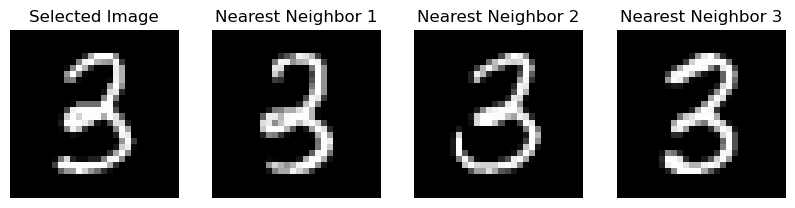

In [11]:
# Select a random image from the test set
np.random.seed(0)
index = np.random.randint(0, X_test.shape[0])
image = X_test[index]

# Train the best KNN model at K=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
distances, indices = knn.kneighbors([image])

plt.figure(figsize=(10, 6))
plt.subplot(1, 4, 1)
plt.imshow(image.reshape(28, 28), cmap='gray')
plt.title("Selected Image")
plt.axis('off')
for i, index in enumerate(indices[0], start=1):
    plt.subplot(1, 4, i+1)
    plt.imshow(X_train[index].reshape(28, 28), cmap='gray')
    plt.title(f"Nearest Neighbor {i}")
    plt.axis('off')
plt.show()

d) Using a dimensionality reduction technique discussed in class, reduce the dimensionality of the dataset before applying a KNN model. Repeat b) and discuss similarities and differences to the previous model. Briefly discuss your choice of dimension and why you think the performance/accuracy of the model has changed.

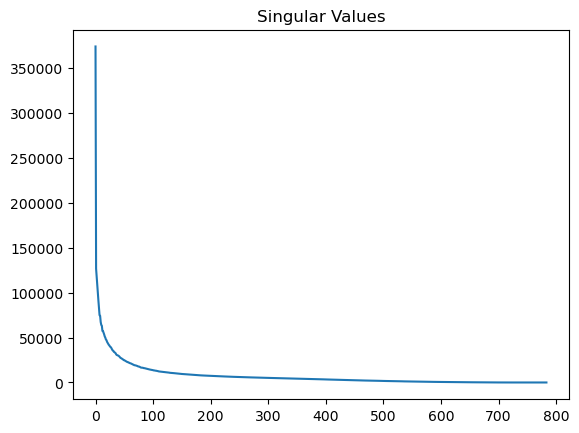

In [19]:
u, s, vt = np.linalg.svd(X_train, full_matrices=False)

plt.plot(s) 
plt.title("Singular Values")
plt.show()

Training progress...: 100%|██████████| 20/20 [01:59<00:00,  5.97s/it]


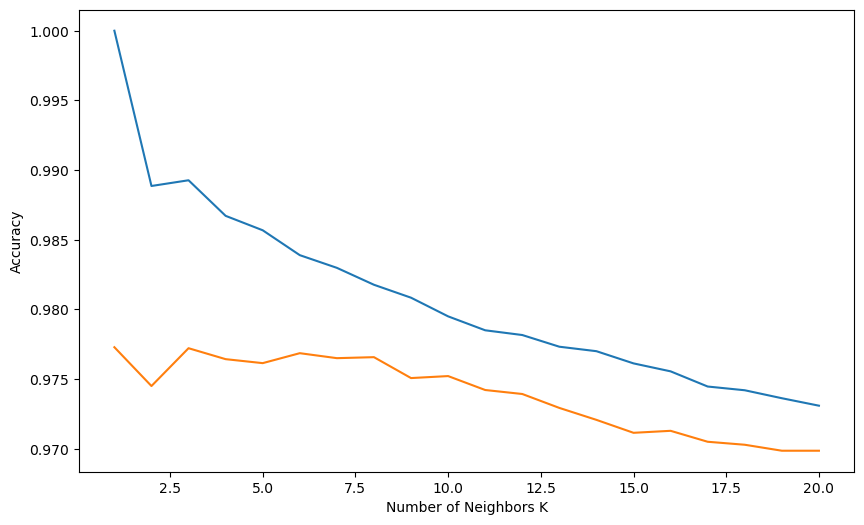

In [20]:
from sklearn.pipeline import make_pipeline 
from sklearn.decomposition import TruncatedSVD

K_range = range(1, 21)
training_accuracies = []
testing_accuracies = []

for K in tqdm(K_range, desc='Training progress...'):
    dimensionality_reduction = TruncatedSVD(n_components=50) 
    knn_model = KNeighborsClassifier(n_neighbors=K)
    # create a pipeline
    model = make_pipeline(dimensionality_reduction, knn_model)
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    training_accuracies.append(accuracy_score(y_train, y_train_pred))
    testing_accuracies.append(accuracy_score(y_test, y_test_pred))

plt.figure(figsize=(10, 6))
plt.plot(K_range, training_accuracies, label='Training Accuracy')
plt.plot(K_range, testing_accuracies, label='Testing Accuracy')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.show()

**discuss similarities and differences**

- Regardless of whether dimension reduction techniques are used, the overall trend of accuracies obtained on the training and test sets with different K values is very similar. If I were to choose an optimal K value, I would still choose K=3, considering both accuracy and generalizability. 
- Both training and testing accuracies have improved by about 0.007. 
- After dimension reduction, the total time spent on training models at different K values significantly decreases (from nearly forty minutes to two minutes), indicating that this technique can greatly optimize the cost of the KNN model. 

**discuss why I choose n_components=50**  

- After observing the singular value plot above, I would choose n_components=50 because the point at n_components=50 in the graph is an elbow point, where the singular values do not significantly decrease thereafter, indicating that more eigenvalues will not bring us particularly much information and so are not worthwhile considering the cost of space and time. 

**discuss why I think the performance/accuracy of the model has changed**

- The KNN method requires calculating the distance from one point to every point in the known dataset. This brute-force approach definitely incurs a large overhead when the data dimensionality is high.
- Dimension reduction can improve the accuracy of KNN classification and solve the curse of dimensionality, which refers to the problem where distance metrics become less effective in high-dimensional spaces, by reducing noise and irrelevant features in the data. 

## Midterm Prep (Part 1)

Compete in the Titanic Data Science Competition on Kaggle: https://www.kaggle.com/c/titanic 

Requirements:

1. Add at least 2 new features to the dataset (explain your reasoning below)
2. Use KNN (and only KNN) to predict survival
3. Explain your process below and choice of K
4. Make a submission to the competition and provide a link to your submission below.
5. Show your code below